# **Једнодимензијска конвекција-дифузија**

Додај текст из презентације!


[0.1 0.3 0.5 0.7 0.9]


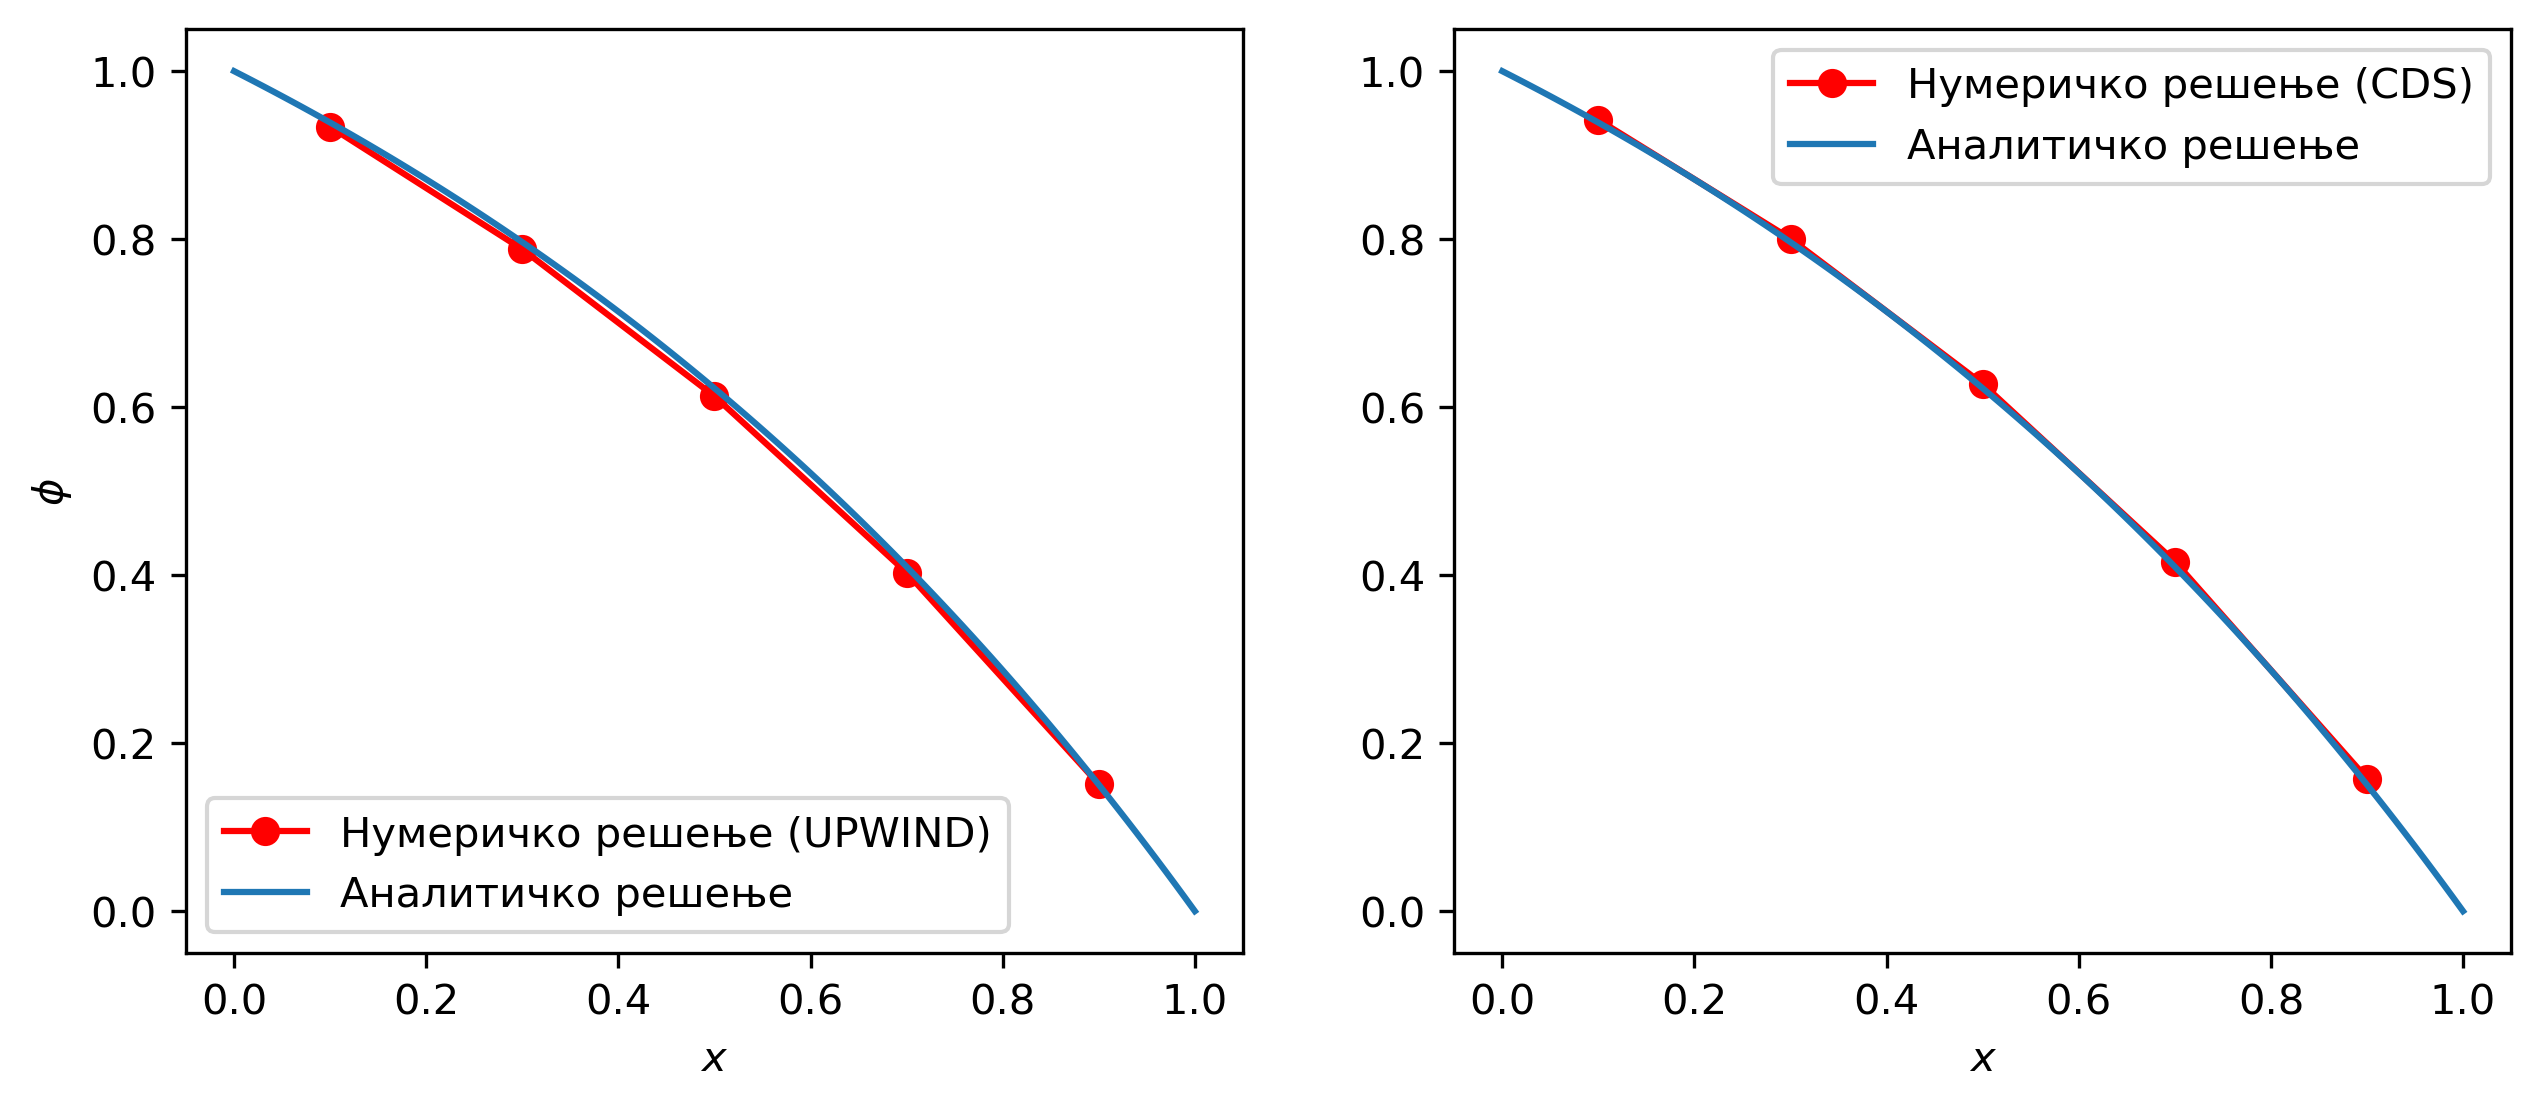

In [14]:
import numpy as np
from matplotlib import pyplot as plt

def analyticalSolution(phi0, phiL, L, F, Gamma, x): # F = rho*u
    return phi0 + (phiL - phi0)*(np.exp(F*x/Gamma)-1)/(np.exp(F*L/Gamma) - 1)

#---------- Definisi ulazne parametre --------------#
N = 5           # broj proracunskih tacaka
L = 1.0         # duzina sipke 
rho = 1.0       # gustina
u =  0.1      # brzina
Gamma = 0.1     # koficijent difuzije
phiA = 1.0      # granicni uslov 1
phiB = 0.0
#---------------------------------------------------#

## Funkcija za resavanje trodijagonalnog sistema jednacina
def TDMASolve(a, b, c, d):
    n = len(d)
    x = [0.]*n  # Vektor resenja
    for k in range (1, n, 1):
        m = a[k]/b[k-1]
        b[k] = b[k] - m*c[k-1]
        d[k] = d[k] - m*d[k-1]
    x[n-1] = d[n-1]/b[n-1]
    for k in range(n-2, -1, -1):
        x[k] = (d[k] - c[k]*x[k+1])/b[k]
    return [x[k] for k in range(n)] # return the solution



deltaX = L/N
D = Gamma/deltaX
F = rho*u
# Analiticko resenje

x = np.linspace(0, L, 100)
phi = analyticalSolution(phiA, phiB, L, F, Gamma, x)

# Formiranje matrica A i b
aW = []; aE = [];  Su = []; Sp = []

x_num = np.linspace(deltaX/2, L-deltaX/2, N)
print (x_num)

#### ------------------ UPWIND ---------------------
# Ovo su sve "unutrasnje tacke"
for i in range (1, N-1, 1):
    aW.append(float(D + F))
    aE.append(float(D))
    Su.append(float(0))
    Sp.append(float(0))
    
## Prosiri liste sa vrednostima u tackama koje 
## su uz levu i desnu granicu
Su.insert(0, (2*D + F)*phiA)
Su.insert(N-1, 2*D*phiB)
Sp.insert(0, -(2*D + F))
Sp.insert(N-1, -2*D)
aW.insert(0, 0.0)
aE.insert(0, D)
aW.insert(N-1, D + F)
aE.insert(N-1, 0.0)
# -------------------------------------------------- ###

aW = np.array(aW); aE = np.array(aE)
Su = np.array(Su); Sp = np.array(Sp)
aP = aW + aE - Sp
numSol_upwind = TDMASolve(-aW, aP, -aE, Su)

###  CDS ---------------------------
aWcs = []; aEcs = [];  Sucs = []; Spcs = []
for i in range (1, N-1, 1):
    aWcs.append(float(D + F/2))
    aEcs.append(float(D - F/2))
    Sucs.append(float(0))
    Spcs.append(float(0))
    
## Prosiri liste sa vrednostima u tackama koje 
## su uz levu i desnu granicu
Sucs.insert(0, (2*D + F)*phiA)
Sucs.insert(N-1, (2*D - F)*phiB)
Spcs.insert(0, -(2*D + F))
Spcs.insert(N-1, -(2*D - F))
aWcs.insert(0, 0.0)
aEcs.insert(0, D - F/2)
aWcs.insert(N-1, D + F/2)
aEcs.insert(N-1, 0.0)
aWcs = np.array(aWcs); aEcs = np.array(aEcs)
Sucs = np.array(Sucs); Spcs = np.array(Spcs)
aPcs = aWcs + aEcs - Spcs
numSol_CDS = TDMASolve(-aWcs, aPcs, -aEcs, Sucs)


plt.figure(figsize=(10,4), dpi=300)
plt.subplot(1,2,1)
plt.xlabel("$x$")
plt.ylabel("$\phi$")
plt.plot(x_num, numSol_upwind, 'ro-', label='Нумеричко решење (UPWIND)')
plt.plot(x, phi, label='Aналитичко решење')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x_num, numSol_CDS, 'ro-', label='Нумеричко решење (CDS)')
plt.plot(x, phi, label='Aналитичко решење')
plt.xlabel("$x$")
plt.legend()